# Simple Linear Regression

This Notebook is divided into three parts:

1. Building Linear Regression Model using `sklearn`
2. Building the model like a Pro using `sklearn`!!
3. Model Building using `statsmodels`

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Building Linear Regression Model using `sklearn`

Below mentioned are the steps to be followed:
1. Load the data
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

### 1. Load the data

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

### 2. Data Preparation

In [5]:
# from sklearn.preprocessing import StandardScaler
# num_features = ['Hours', 'Scores']
# standardized_data = StandardScaler().fit_transform(df)
# print(standardized_data.shape)

In [6]:
# print(type(standardized_data))

In [7]:
# print(standardized_data)

In [8]:
# df = pd.DataFrame(standardized_data, columns = num_features)
# df.head()

In [9]:
target = df['Scores']
data = df[['Hours']]

In [10]:
data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [11]:
target

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, \
                                                    random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


In [53]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [54]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


### 3. Training the model

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  2.370815382341881
slope:  [9.78856669]


### 4. Prediction

In [57]:
y_test_pred = regressor.predict(X_test)

In [58]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


### 5. Evaluation

In [60]:
from sklearn import metrics

# print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

# print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  4.792191274636315


In [61]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257


# Building the model like a Pro using `sklearn`!!

Below mentioned are the steps to be followed:
1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

### 1. Loading the Data

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/student_scores.csv')

### 2. Understanding and Visuallizing the data

In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

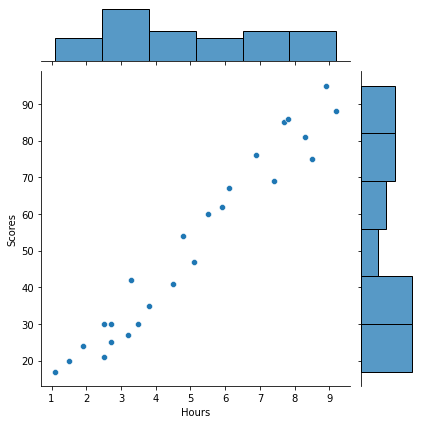

In [7]:
sns.jointplot(x='Hours', y='Scores', data=df, kind = 'scatter')

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

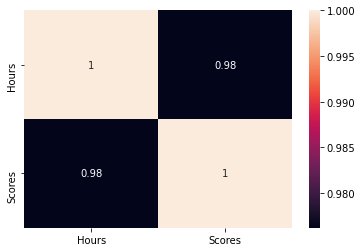

In [9]:
plt.figure()
sns.heatmap(df.corr(), annot = True)

### 3. Data Preparation
1. Splitting df into train and test
2. Rescaling the variables (Normalisation or Standardisation)
    - Interpretability improves
    - Model trains fast

In [10]:
X = df[['Hours']]
y = df['Scores']

In [11]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, \
                                                    random_state=0)

print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [12]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [13]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = X_train.columns

norm_train_data = rescale.fit_transform(X_train)

print(norm_train_data.shape, type(norm_train_data))

(17, 1) <class 'numpy.ndarray'>


In [14]:
X_train = pd.DataFrame(norm_train_data, columns = num_features)

X_train.head()

,Hours
0,0.716049
1,0.000000
2,0.493827
3,0.814815
4,0.271605


### 4. Training

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
print('y intercept: ',regressor.intercept_)

y intercept:  13.138238737765825


In [17]:
print('slope: ',regressor.coef_)

slope:  [79.28739016]


### 5. Residual Analysis on Training Data

1. Distribution of the Residuals - Distribution should be normal (Gaussian) with Zero Mean.
2. IID - Check for patterns in Residuals - There should exist no pattern
3. Homoscedasticity - The variance of residual is the same for any value of X

In [18]:
y_train_pred = regressor.predict(X_train)

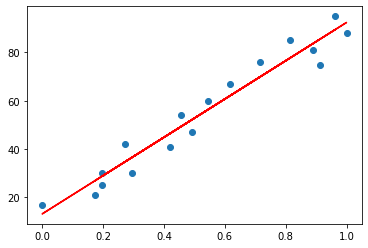

In [19]:
plt.scatter(X_train, y_train)

plt.plot(X_train, y_train_pred, 'r')

plt.show()

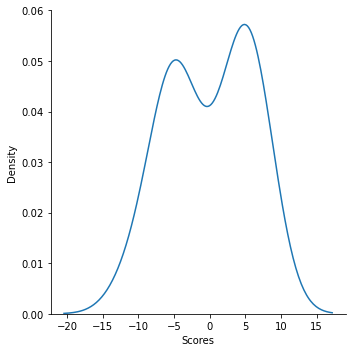

In [20]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

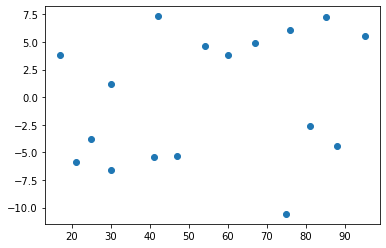

In [21]:
plt.scatter(y_train, residual)

plt.show()

### 6. Making the Prediction

In [22]:
num_features = X_test.columns

norm_test_data = rescale.transform(X_test)

print(norm_test_data.shape, type(norm_test_data))

(8, 1) <class 'numpy.ndarray'>


In [23]:
X_test = pd.DataFrame(norm_test_data, columns = num_features)

X_test.head()

,Hours
0,0.049383
1,0.259259
2,0.777778
3,0.172840
4,0.592593


In [24]:
y_test_pred = regressor.predict(X_test)

In [25]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


### 7. Evaluating the Algorithm

In [26]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.419727808027654
Mean Squared Error:  22.965097212700435
Root Mean Squared Error:  4.792191274636315


In [29]:
metrics.median_absolute_error(y_test, y_test_pred)

3.862568346386883

In [27]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257


In [28]:
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9496246288507799


# Model Building using `statsmodels`

Below mentioned are the generic steps for model building using `statsmodels`

1. Load the data
2. Understand and Viz the data
3. Data Preparation - train-test Split, Normalisation or Rescaling
4. Training the Model using `statsmodels`
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation

### 1. Load the Data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('student_scores.csv')

### 2. Understand and Viz the data

**(Refer Code from previous section)**

In [47]:
# Do it yourself

### 3. Data Preparation

In [48]:
# Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(17, 2)
(8, 2)


In [49]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['Hours', 'Scores']

norm_train_data = rescale.fit_transform(df_train.loc[:,num_features])

print(norm_train_data.shape, type(norm_train_data))

(17, 2) <class 'numpy.ndarray'>


In [50]:
df_train = pd.DataFrame(norm_train_data, columns = num_features)

df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [51]:
y_train = df_train.pop('Scores')
X_train = df_train

### 4. Building the Model using `statsmodels`

In [52]:
import statsmodels.api as sm

In [53]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [54]:
lr.params

const   -0.049510
Hours    1.016505
dtype: float64

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           4.52e-11
Time:                        15:15:35   Log-Likelihood:                 20.571
No. Observations:                  17   AIC:                            -37.14
Df Residuals:                      15   BIC:                            -35.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0495      0.037     -1.330      0.2

**Understanding the above Statistical Summary about the model**

We are interested in below mentioned values:
1. The coefficient and its p-value
2. R - Square value
3. p - value of F Statistics

**1. The coefficient of Hours is 1.0165 and its p - value is 0.000**

This means the coefficient is statistically significant.

**2. R - Square value is 0.948**

i.e. 94.8 % variance in `Scores` is explained by `Hours`

**3. Observe that F - Statistics has a very low p - value**

This means that the complete model is statistically significant. 

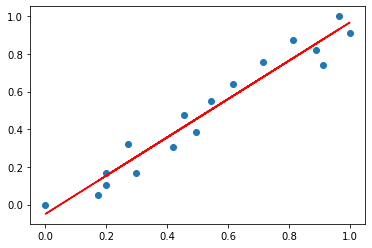

In [56]:
plt.scatter(X_train, y_train)

plt.plot(X_train, -0.0495 + 1.0165 * X_train, 'r')

plt.show()

### 5. Residual Analysis
**(Refer Code from previous section)**

In [57]:
# Do it yourself

### 6. Prediction
**(Refer Code from previous section)**

In [58]:
# Do it yourself

### 7. Evaluation
**(Refer Code from previous section)**

In [59]:
# Do it yourself